# Analysis Overview
## Here we will look at three interesting questions pertaining to the 2017 Stack Overflow Survery Data
## The questions on which we will focus are:
- Question 1: How likely is someone to program as a hobby or contribute to open source projects, based on their current professional status?
- Question 2: If someone responded that they don't care what they work on as long as they are paid well, what is their reported salary?
- Question 3: For respondents who have finished college, how does job satisfaction depend on level of formal education?

### Let's begin by importing the necessary libraries and creating the dataframe

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Employed full-time   
4                      Employed full-time   

                                     FormalEducation  \
0                                   Secondary school   
1  Some college/university study without earning ...   
2                                  Bachelor's degree   
3                                    Doctoral degree   
4                                    Master's degree   

                                  MajorUndergrad  \
0                                            NaN   
1       Computer science or software engineering   
2       Computer science or software engineering   
3  A non-computer-focused engineering discipline   
4       Computer science or software engineering   

                                          HomeRemote  \
0                                                NaN   
1              More than half, but not all, the time   
2  Less than half the time, but at least one day ...   
3  Less than half the time, but at least one day ...   
4                                              Never   

                CompanySize  ... StackOverflowMakeMoney Gender  \
0                       NaN  ...      Strongly disagree   Male   
1        20 to 99 employees  ...      Strongly disagree   Male   
2  10,000 or more employees  ...               Disagree   Male   
3  10,000 or more employees  ...               Disagree   Male   
4        10 to 19 employees  ...                    NaN    NaN   

  HighestEducationParents                          Race         SurveyLong  \
0             High school  White or of European descent  Strongly disagree   
1       A master's degree  White or of European descent     Somewhat agree   
2   A professional degree  White or of European descent     Somewhat agree   
3       A doctoral degree  White or of European descent              Agree   
4                     NaN                           NaN                NaN   

  QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0       Strongly agree           Disagree    Strongly agree       NaN   
1       Somewhat agree           Disagree    Strongly agree       NaN   
2                Agree           Disagree             Agree  113750.0   
3                Agree     Somewhat agree    Strongly agree       NaN   
4                  NaN                NaN               NaN       NaN   

   ExpectedSalary  
0             NaN  
1         37500.0  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 154 columns]

### Next, determined which columns have no missing values:

In [280]:
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

# ==============================================================

# Analysis for Question 1
- Question 1 statement: How likely is someone to program as a hobby or contribute to open source projects, based on their current professional status?

### To begin, let's get a feeling for the types of responses to the survey question "Which of the following best describes you?", in the "Professional" column of the dataframe. From above, we can see that the "Professional" column has no missing values.

In [281]:
# Breaking down values in the "Professional" column by response
Professional_vals = df.Professional.value_counts()

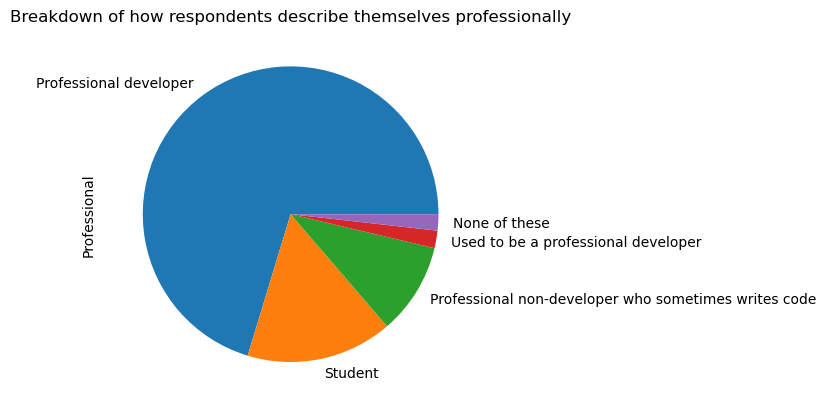

In [282]:
# Normalizing by the total number of respondents, given the the number of rows in the dataframe: df.shape[0]
(Professional_vals/df.shape[0]).plot(kind="pie");
plt.title("Breakdown of how respondents describe themselves professionally");

### From the pie chart breakdown above, one can see that most responded as "Professional developer", followed by "Student" and "Professional non-developer who sometimes writes code". The remaining responses had very few participants.

### Here are the normalized breakdown probabilities by response:

In [283]:
# Output normalized responses
print(Professional_vals/df.shape[0])

Professional developer                                  0.703047
Student                                                 0.160025
Professional non-developer who sometimes writes code    0.100016
Used to be a professional developer                     0.019127
None of these                                           0.017785
Name: Professional, dtype: float64


### Here we see that the majority of respondents identify as professional developers, at 70.3%. Next, let's do a similar analysis on the breakdown of responses to the question "Do you program as a hobby or contribute to open source projects?" for the column "ProgramHobby". We know that "ProgramHobby" does have missing values, but we will continue with the analysis to compare which responses were give.

In [284]:
# Breaking down values in the "ProgramHobby" column by response
Hobby_vals = df.ProgramHobby.value_counts()

In [285]:
# Normalizing by the total number of respondents, given the the number of rows in the dataframe: df.shape[0]
(Hobby_vals/df.shape[0]).plot(kind="pie");
plt.title("Responses: Do you program as a hobby or contribute to open source projects");

In [286]:
# Output normalized responses
print(Hobby_vals/df.shape[0])

Yes, I program as a hobby                    0.482585
Yes, both                                    0.267668
No                                           0.190438
Yes, I contribute to open source projects    0.059309
Name: ProgramHobby, dtype: float64


### Now let's determine how people responded based on their profession in the survey.

In [287]:
# Filter the main dataframe to include only respondents filtered by their professions
df_pro_dev = df[df['Professional'] == 'Professional developer']
df_student = df[df['Professional'] == 'Student']
df_pro_nondev = df[df['Professional'] == 'Professional non-developer who sometimes writes code']
df_used = df[df['Professional'] == 'Used to be a professional developer']

# Now break down values based on profession 
Hobby_vals_pro_dev = df_pro_dev.ProgramHobby.value_counts()
Hobby_vals_student = df_student.ProgramHobby.value_counts()
Hobby_vals_pro_nondev = df_pro_nondev.ProgramHobby.value_counts()
Hobby_vals_used = df_used.ProgramHobby.value_counts()

# And see how the normalized responses here look
# And see how the normalized responses here look
print('Professional developer:')
print(Hobby_vals_pro_dev/df_pro_dev.shape[0])
print('\nStudent:')
print(Hobby_vals_student/df_student.shape[0])
print('\nProfessional non-developer who sometimes writes code:')
print(Hobby_vals_pro_nondev/df_pro_nondev.shape[0])
print('\nUsed to be a professional developer:')
print(Hobby_vals_used/df_used.shape[0])

Professional developer:
Yes, I program as a hobby                    0.452105
Yes, both                                    0.277352
No                                           0.208464
Yes, I contribute to open source projects    0.062080
Name: ProgramHobby, dtype: float64

Student:
Yes, I program as a hobby                    0.588886
Yes, both                                    0.246960
No                                           0.123906
Yes, I contribute to open source projects    0.040248
Name: ProgramHobby, dtype: float64

Professional non-developer who sometimes writes code:
Yes, I program as a hobby                    0.499805
Yes, both                                    0.227821
No                                           0.202724
Yes, I contribute to open source projects    0.069650
Name: ProgramHobby, dtype: float64

Used to be a professional developer:
Yes, I program as a hobby                    0.472024
Yes, both                                    0.261445
No          

### Plotting these results allows us to see how likely people are to spend time coding as a hobby, based on their reported professional status. Here, we can use a bar graph because it is easy to display the normalized results.

In [288]:
# And plotting these results together on a bar graph:
#(Hobby_vals/df.shape[0])[0].plot(kind="box");
#(Hobby_vals_pro_dev/df_pro_dev.shape).plot(kind="box");
#plt.title("Do you program as a hobby or contribute to open source projects");
plt.figure(1)
plt.xticks([1.15,2.15,3.15,4.15],
           ['Yes, I program as a hobby','Yes, both','No','Yes, I contribute to open source projects'], rotation = 90)
plt.title('Hobby Coding by Profession')
plt.bar(1,(Hobby_vals_pro_dev/df_pro_dev.shape[0])[0], width = 0.1, color = 'b',label='Pro developer')
plt.bar(2,(Hobby_vals_pro_dev/df_pro_dev.shape[0])[1], width = 0.1, color = 'b')
plt.bar(3,(Hobby_vals_pro_dev/df_pro_dev.shape[0])[2], width = 0.1, color = 'b')
plt.bar(4,(Hobby_vals_pro_dev/df_pro_dev.shape[0])[2], width = 0.1, color = 'b')
plt.bar(1.1,(Hobby_vals_student/df_student.shape[0])[0], width = 0.1, color = 'r',label='Student')
plt.bar(2.1,(Hobby_vals_student/df_student.shape[0])[1], width = 0.1, color = 'r')
plt.bar(3.1,(Hobby_vals_student/df_student.shape[0])[2], width = 0.1, color = 'r')
plt.bar(4.1,(Hobby_vals_pro_nondev/df_pro_nondev.shape[0])[2], width = 0.1, color = 'r')
plt.bar(1.2,(Hobby_vals_pro_nondev/df_pro_nondev.shape[0])[0], width = 0.1, color = 'g',label='Pro non developer')
plt.bar(2.2,(Hobby_vals_pro_nondev/df_pro_nondev.shape[0])[1], width = 0.1, color = 'g')
plt.bar(3.2,(Hobby_vals_pro_nondev/df_pro_nondev.shape[0])[2], width = 0.1, color = 'g')
plt.bar(4.2,(Hobby_vals_pro_nondev/df_pro_nondev.shape[0])[2], width = 0.1, color = 'g')
plt.bar(1.3,(Hobby_vals_used/df_used.shape[0])[0], width = 0.1, color = 'k',label='Past pro developer')
plt.bar(2.3,(Hobby_vals_used/df_used.shape[0])[1], width = 0.1, color = 'k')
plt.bar(3.3,(Hobby_vals_used/df_used.shape[0])[2], width = 0.1, color = 'k')
plt.bar(4.3,(Hobby_vals_used/df_used.shape[0])[2], width = 0.1, color = 'k')
plt.legend()
plt.ylim(0,1)
plt.xlim(0.5,4.5)

(0.5, 4.5)

# Summary for Question 1:
### Finally, we can see from the above graph how many respondents spend time coding as a hobby, broken out by their professional status. A prominent feature of this plot is how students spend more time coding compared to other professions for those who answered "Yes, I program as a hobby". One can speculate that perhaps this is because student's may have more free time, or they are contributing to coding outside of their required work to gain more experience in the field.

# ==============================================================

# Analysis for Question 2
- Question 2 statement: If someone responded that they don't care what they work on as long as they are paid well, what is their reported salary?


### By filtering, we can build a dataframe from the main one, containing only values where people responded to the question "I don't really care what I work on, so long as I'm paid well". This is one method of dealing with missing data points from the WorkPayCare data set.

In [289]:
df_workpaycare = df[df['WorkPayCare'].isnull() == False]
df_workpaycare.head()

Respondent                                       Professional  \
0            1                                            Student   
2            3                             Professional developer   
3            4  Professional non-developer who sometimes write...   
8            9                             Professional developer   
14          15                             Professional developer   

                 ProgramHobby         Country      University  \
0                   Yes, both   United States              No   
2                   Yes, both  United Kingdom              No   
3                   Yes, both   United States              No   
8   Yes, I program as a hobby        Colombia  Yes, part-time   
14  Yes, I program as a hobby  United Kingdom              No   

                          EmploymentStatus      FormalEducation  \
0   Not employed, and not looking for work     Secondary school   
2                       Employed full-time    Bachelor's degree   
3                       Employed full-time      Doctoral degree   
8                       Employed full-time    Bachelor's degree   
14                      Employed full-time  Professional degree   

                                       MajorUndergrad  \
0                                                 NaN   
2            Computer science or software engineering   
3       A non-computer-focused engineering discipline   
8            Computer science or software engineering   
14  Computer engineering or electrical/electronics...   

                                           HomeRemote  \
0                                                 NaN   
2   Less than half the time, but at least one day ...   
3   Less than half the time, but at least one day ...   
8   Less than half the time, but at least one day ...   
14  All or almost all the time (I'm full-time remote)   

                 CompanySize  ... StackOverflowMakeMoney Gender  \
0                        NaN  ...      Strongly disagree   Male   
2   10,000 or more employees  ...               Disagree   Male   
3   10,000 or more employees  ...               Disagree   Male   
8   5,000 to 9,999 employees  ...      Strongly disagree   Male   
14  5,000 to 9,999 employees  ...               Disagree   Male   

   HighestEducationParents                          Race         SurveyLong  \
0              High school  White or of European descent  Strongly disagree   
2    A professional degree  White or of European descent     Somewhat agree   
3        A doctoral degree  White or of European descent              Agree   
8      A bachelor's degree     Hispanic or Latino/Latina     Somewhat agree   
14             High school  White or of European descent     Somewhat agree   

   QuestionsInteresting QuestionsConfusing InterestedAnswers    Salary  \
0        Strongly agree           Disagree    Strongly agree       NaN   
2                 Agree           Disagree             Agree  113750.0   
3                 Agree     Somewhat agree    Strongly agree       NaN   
8        Strongly agree           Disagree    Strongly agree       NaN   
14                Agree           Disagree             Agree  100000.0   

    ExpectedSalary  
0              NaN  
2              NaN  
3              NaN  
8              NaN  
14             NaN  

[5 rows x 154 columns]

### Now let's see a breakdown of these responses from this filtered data set:

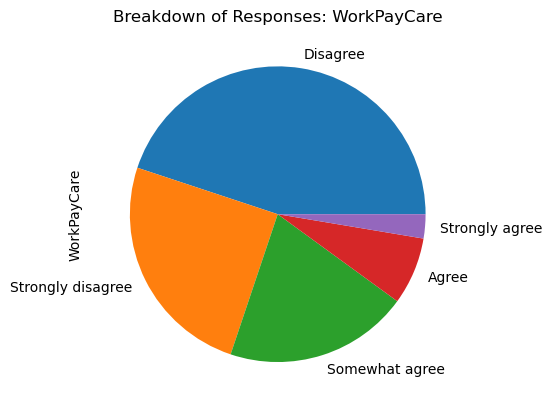

In [290]:
workpaycare_vals = df_workpaycare.WorkPayCare.value_counts()
# Plotting as a pie chare
(workpaycare_vals/df_workpaycare.shape[0]).plot(kind="pie");
plt.title('Breakdown of Responses: WorkPayCare');

In [291]:
# Output normalized responses
print(workpaycare_vals/df_workpaycare.shape[0])

Disagree             0.449120
Strongly disagree    0.249281
Somewhat agree       0.201453
Agree                0.073761
Strongly agree       0.026385
Name: WorkPayCare, dtype: float64


### One can see from the above that in response to the question "I don't really care what I work on, so long as I'm paid well"; 44.9% disagree, 24.9% strongly disagree, 20.1% somewhat agree, 7.3% agree, and 2.6% strongly agree.

### Next, within this filtered dataset, let's get a feeling for how many of those who responded entered salary data. This is yet again, another technique for dealing with missing data. 

In [292]:
df_salary = df_workpaycare[df_workpaycare['Salary'].isnull() == False]
df_salary.head()

Respondent            Professional               ProgramHobby  \
2            3  Professional developer                  Yes, both   
14          15  Professional developer  Yes, I program as a hobby   
17          18  Professional developer                  Yes, both   
18          19  Professional developer  Yes, I program as a hobby   
25          26  Professional developer  Yes, I program as a hobby   

           Country      University    EmploymentStatus      FormalEducation  \
2   United Kingdom              No  Employed full-time    Bachelor's degree   
14  United Kingdom              No  Employed full-time  Professional degree   
17   United States  Yes, part-time  Employed full-time    Bachelor's degree   
18   United States              No  Employed full-time    Bachelor's degree   
25   United States              No  Employed full-time      Master's degree   

                                       MajorUndergrad  \
2            Computer science or software engineering   
14  Computer engineering or electrical/electronics...   
17           Computer science or software engineering   
18           Computer science or software engineering   
25           Computer science or software engineering   

                                           HomeRemote  \
2   Less than half the time, but at least one day ...   
14  All or almost all the time (I'm full-time remote)   
17  All or almost all the time (I'm full-time remote)   
18                              A few days each month   
25  Less than half the time, but at least one day ...   

                 CompanySize  ... StackOverflowMakeMoney Gender  \
2   10,000 or more employees  ...               Disagree   Male   
14  5,000 to 9,999 employees  ...               Disagree   Male   
17  1,000 to 4,999 employees  ...               Disagree   Male   
18  10,000 or more employees  ...                    NaN    NaN   
25  10,000 or more employees  ...               Disagree   Male   

   HighestEducationParents                                               Race  \
2    A professional degree                       White or of European descent   
14             High school                       White or of European descent   
17       A master's degree  Native American, Pacific Islander, or Indigeno...   
18                     NaN                                                NaN   
25       A master's degree                       White or of European descent   

        SurveyLong QuestionsInteresting QuestionsConfusing InterestedAnswers  \
2   Somewhat agree                Agree           Disagree             Agree   
14  Somewhat agree                Agree           Disagree             Agree   
17        Disagree                Agree           Disagree             Agree   
18             NaN                  NaN                NaN               NaN   
25        Disagree       Strongly agree           Disagree    Strongly agree   

      Salary  ExpectedSalary  
2   113750.0             NaN  
14  100000.0             NaN  
17  130000.0             NaN  
18   82500.0             NaN  
25  175000.0             NaN  

[5 rows x 154 columns]

In [293]:
df_stronglydisagree = df_salary[df_salary['WorkPayCare'] == 'Strongly disagree']
df_disagree = df_salary[df_salary['WorkPayCare'] == 'Disagree']
df_somewhatagree = df_salary[df_salary['WorkPayCare'] == 'Somewhat agree']
df_agree = df_salary[df_salary['WorkPayCare'] == 'Agree']
df_stronglyagree = df_salary[df_salary['WorkPayCare'] == 'Strongly agree']
data = [df_stronglydisagree['Salary'],
        df_disagree['Salary'],
        df_somewhatagree['Salary'],
        df_agree['Salary'],
        df_stronglyagree['Salary']
       ]

In [294]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.xticks([1,2,3,4,5],['Strongly disagree','Disagree','Somewhat agree','Agree','Strongly agree'],rotation=90)
plt.xlabel('I don\'t really care what I work on, so long as I\'m paid well')
plt.ylabel('Salary distribution')
plt.title('Salary Broken Down by Response')

Text(0.5, 1.0, 'Salary Broken Down by Response')

### And finally we can compare the numerical values from the above plot for the medians in each case, where we see there are very small differences between them:

In [307]:
print(df_stronglydisagree['Salary'].median())
print(df_disagree['Salary'].median())
print(df_somewhatagree['Salary'].median())
print(df_agree['Salary'].median())
print(df_stronglyagree['Salary'].median())

48387.0967741935
51583.7104072398
52000.0
50000.0
45469.5340501792


# Summary for Question 2:
### Surprisingly, the above figure suggests that the respondent's reported salary is esssentially independent of their responses to the questions "I don't really care what I work on, so long as I'm paid well". One might have expected those who make the highest salary might care the least about their work, but this does not seem to be the case.

# ==============================================================

# Analysis for Question 3
- Question 3 statement: For respondents who have finished college, how does job satisfaction depend on level of formal education?

### To begin, look at the values reported for the question "Which of the following best describes the highest level of formal education that you've completed?" from the main dataframe that is not filtered. By plotting this on a bar chart, we can easily see all responses and the relative number of respondents who selected each one.

In [382]:
# Values reported for formal education; recall that this column has no missing values, from our analysis at the beginning
ed_vals = df['FormalEducation'].value_counts()
(ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Breakdown of Highest Level of Formal Education Responses");

### Next, let's separate these data into the categories by focusing only on those respondents who reported 1) Bachelor's degree, 2) Master's degree, and 3) Doctoral degree. Once again, note that there are no missing values from these subsets of df['FormalEducation'].

In [317]:
df_bach = df[df['FormalEducation'] == 'Bachelor\'s degree']
df_mast = df[df['FormalEducation'] == 'Master\'s degree']
df_doc = df[df['FormalEducation'] == 'Doctoral degree']

### Now let's see how the values look for reported job satisfaction. A pie plot is useful here, just for looking at the relative number of responses for each value reported.

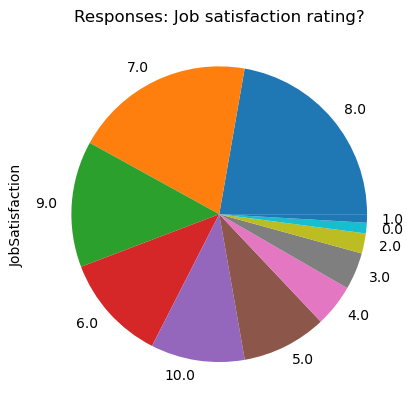

In [326]:
satisfaction_vals = df['JobSatisfaction'].value_counts()
(satisfaction_vals).plot(kind="pie");
plt.title("Responses: Job satisfaction rating?");

### Let's further pare down the formal education data to exclude entries that are blank for the job satisfaction data:

In [341]:
df_bach_nonulls = df_bach[df_bach['JobSatisfaction'].isnull() == False]
df_mast_nonulls = df_mast[df_mast['JobSatisfaction'].isnull() == False]
df_doc_nonulls = df_doc[df_doc['JobSatisfaction'].isnull() == False]

### And then plot these data separated by number of responses for each score on a bar graph, where a semi-log scale has been used to allow the reader to more easily view all data displayed.

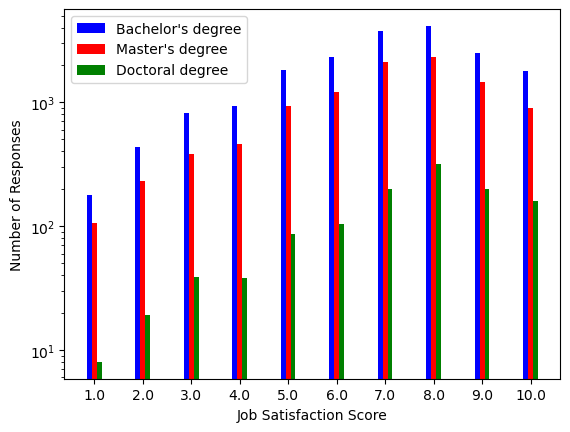

In [381]:
plt.figure()
# Bachelor's degree
plt.bar(1, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 1.0]), width = 0.1, color = 'b', label = 'Bachelor\'s degree')
plt.bar(2, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 2.0]), width = 0.1, color = 'b')
plt.bar(3, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 3.0]), width = 0.1, color = 'b')
plt.bar(4, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 4.0]), width = 0.1, color = 'b')
plt.bar(5, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 5.0]), width = 0.1, color = 'b')
plt.bar(6, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 6.0]), width = 0.1, color = 'b')
plt.bar(7, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 7.0]), width = 0.1, color = 'b')
plt.bar(8, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 8.0]), width = 0.1, color = 'b')
plt.bar(9, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 9.0]), width = 0.1, color = 'b')
plt.bar(10, len(df_bach_nonulls[df_bach_nonulls['JobSatisfaction'] == 10.0]), width = 0.1, color = 'b')

# Master's degree
plt.bar(1.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 1.0]), width = 0.1, color = 'r', label = 'Master\'s degree')
plt.bar(2.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 2.0]), width = 0.1, color = 'r')
plt.bar(3.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 3.0]), width = 0.1, color = 'r')
plt.bar(4.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 4.0]), width = 0.1, color = 'r')
plt.bar(5.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 5.0]), width = 0.1, color = 'r')
plt.bar(6.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 6.0]), width = 0.1, color = 'r')
plt.bar(7.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 7.0]), width = 0.1, color = 'r')
plt.bar(8.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 8.0]), width = 0.1, color = 'r')
plt.bar(9.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 9.0]), width = 0.1, color = 'r')
plt.bar(10.1, len(df_mast_nonulls[df_mast_nonulls['JobSatisfaction'] == 10.0]), width = 0.1, color = 'r')

# Doctoral degree
plt.bar(1.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 1.0]), width = 0.1, color = 'g', label = 'Doctoral degree')
plt.bar(2.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 2.0]), width = 0.1, color = 'g')
plt.bar(3.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 3.0]), width = 0.1, color = 'g')
plt.bar(4.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 4.0]), width = 0.1, color = 'g')
plt.bar(5.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 5.0]), width = 0.1, color = 'g')
plt.bar(6.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 6.0]), width = 0.1, color = 'g')
plt.bar(7.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 7.0]), width = 0.1, color = 'g')
plt.bar(8.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 8.0]), width = 0.1, color = 'g')
plt.bar(9.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 9.0]), width = 0.1, color = 'g')
plt.bar(10.2, len(df_doc_nonulls[df_doc_nonulls['JobSatisfaction'] == 10.0]), width = 0.1, color = 'g')

plt.xticks([1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1], ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'])
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Number of Responses')
plt.legend(loc = 'best')
plt.yscale('log')

### Summary for Question 3:
### From the above plot, one can conclude that the most commonly reported job satisfaction score from 1.0 to 10.0 for respondents who have at least finished college is 8.0, independent of their level of formal education. The relative differences in height displayed here arise from the difference in the number of respondents in each formal education category. There are far more respondents who have as their formal education level as "Bachelor's degree", with the number having "Mater's degree" following that, and the least number of respondents having "Doctoral degree" as their level of formal education.